In [77]:
from other_models.img.rotate_crop import getRotatedRectanglePoints, Point, getBounds, getBoundsCenter
import PIL
from other_models.img.processor import read_img_file, concatenate_images

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [78]:
data_dir = '../data/training/'
train_data_filename = data_dir + 'images/'
train_labels_filename = data_dir + 'groundtruth/' 


In [79]:
original_img = read_img_file(train_data_filename, 1, True)
gt_original_img = read_img_file(train_labels_filename, 1, True)

Loading ../data/training/images/satImage_001.png
Loading ../data/training/groundtruth/satImage_001.png


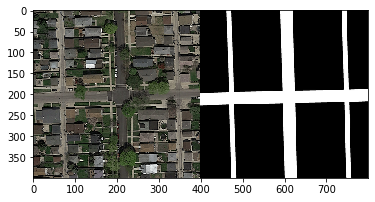

In [80]:
plt.imshow(concatenate_images(original_img, gt_original_img))

In [81]:
padding = original_img.shape[0], original_img.shape[1]

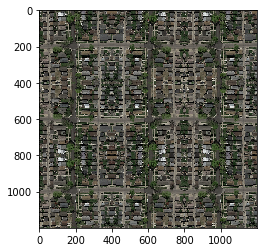

In [82]:
# (0, 0) padding for color channels
plt.imshow(np.lib.pad(original_img, (padding, padding, (0, 0)), 'reflect'))

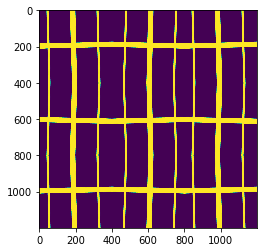

In [83]:
gt_padded = np.lib.pad(gt_original_img, (padding, padding), 'reflect')
plt.imshow(gt_padded)


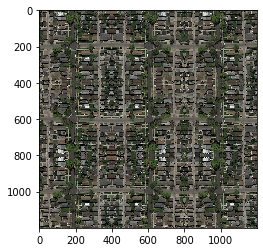

In [84]:
# (0, 0) padding for color channels
plt.imshow(np.lib.pad(original_img, (padding, padding, (0, 0)), 'symmetric'))

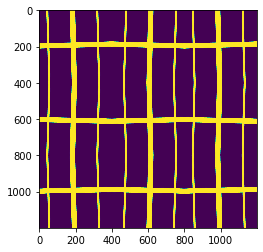

In [85]:
gt_padded = np.lib.pad(gt_original_img, (padding, padding), 'symmetric')
plt.imshow(gt_padded)

In [86]:
# symmetric != reflect
np.mean(np.lib.pad(original_img, (padding, padding, (0, 0)), 'symmetric') 
        == np.lib.pad(original_img, (padding, padding, (0, 0)), 'reflect'))


0.15457685185185185

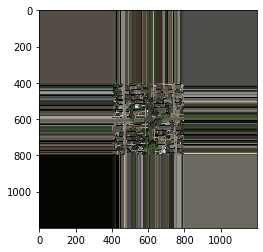

In [87]:
# (0, 0) padding for color channels
plt.imshow(np.lib.pad(original_img, (padding, padding, (0, 0)), 'edge'))

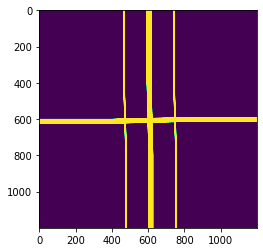

In [88]:
gt_padded = np.lib.pad(gt_original_img, (padding, padding), 'edge')
plt.imshow(gt_padded)



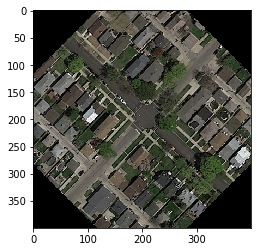

In [89]:
rotated_45 = np.asarray(PIL.Image.fromarray(np.uint8(original_img * 255)).rotate(45)).astype('float32')/255.0
plt.imshow(rotated_45)

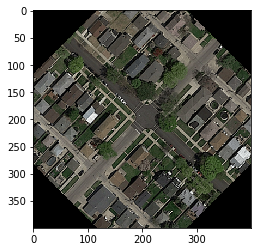

In [90]:

rotated_45 = np.asarray(PIL.Image.fromarray(np.uint8(original_img * 255)).rotate(45, resample=Image.BICUBIC)).astype('float32')/255.0
plt.imshow(rotated_45)

In [91]:
from evoline.img.processor import img_crop
crops = img_crop(original_img, 16, 16, padding=16)
crop = crops[5]

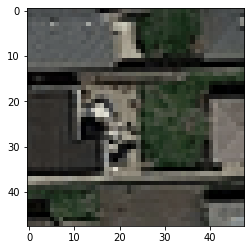

In [92]:
plt.imshow(crop)

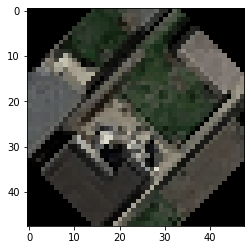

In [93]:
rotated_crop_45 = np.asarray(PIL.Image.fromarray(np.uint8(crop * 255)).rotate(45)).astype('float32')/255.0
plt.imshow(rotated_crop_45)

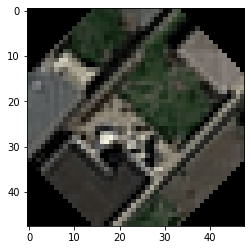

In [94]:
rotated_crop_45 = np.asarray(PIL.Image.fromarray(np.uint8(crop * 255)).rotate(45, resample=Image.BICUBIC)).astype('float32')/255.0
plt.imshow(rotated_crop_45)

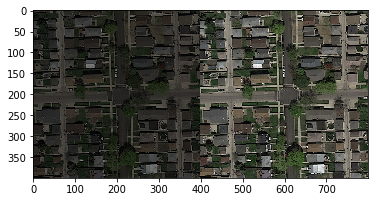

In [95]:
colored = np.clip(original_img * 0.5, 0, 1)
plt.imshow(concatenate_images(colored, original_img))

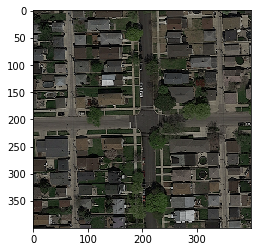

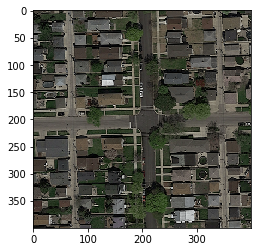

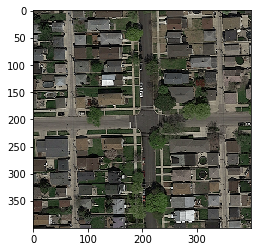

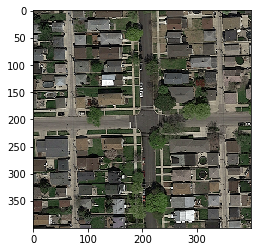

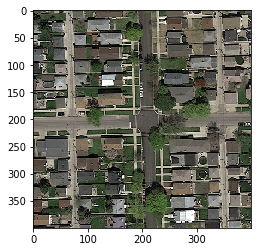

In [96]:
for factor in np.arange(-0.2, 0.3, 0.1):
    img = np.clip(original_img * (1 + factor), 0, 1)
    plt.figure()
    plt.imshow(img)
    # print(f'factor {factor}')

In [97]:
points = getRotatedRectanglePoints(0, Point(0, 10), 30, 30)
p_bounds = getBounds(points)

print(points)
print(p_bounds)

(Point(x=0, y=10), Point(x=30.0, y=10.0), Point(x=30.0, y=40.0), Point(x=1.83697019872103e-15, y=40.0))
Bound(left=0, upper=10, right=30.0, lower=40.0)


In [98]:
rotated_points = getRotatedRectanglePoints(np.pi/4, Point(0, 10), 30, 30)
rotated_p_bounds = getBounds(rotated_points)

print(rotated_points)
print(rotated_p_bounds)


1.0 > 1

(Point(x=0, y=10), Point(x=21.213203435596427, y=-11.213203435596423), Point(x=42.42640687119285, y=10.000000000000004), Point(x=21.213203435596427, y=31.213203435596423))
Bound(left=0, upper=-11.213203435596423, right=42.42640687119285, lower=31.213203435596423)


False

In [99]:

back_to_origin_points = getRotatedRectanglePoints(-np.pi/4, rotated_points[0], 30, 30)
back_to_origin_p_bounds = getBounds(back_to_origin_points)

print(back_to_origin_points)
print(back_to_origin_p_bounds)

(Point(x=0, y=10), Point(x=21.213203435596427, y=31.213203435596423), Point(x=3.552713678800501e-15, y=52.42640687119285), Point(x=-21.213203435596423, y=31.213203435596427))
Bound(left=-21.213203435596423, upper=10, right=21.213203435596427, lower=52.42640687119285)


In [182]:
angle = 30
base = Point(41, 40)

points = getRotatedRectanglePoints(np.pi * (angle / 180), base, 72, 72)
bounds = getBounds(points)

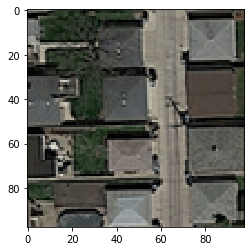

In [183]:
boundary_image = original_img[int(round(bounds.left)): int(round(bounds.right)), 
                 int(round(bounds.upper)):int(round(bounds.lower)),
                 :]
plt.imshow(boundary_image)

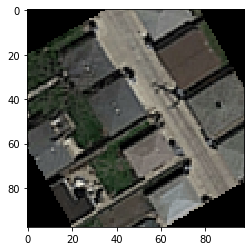

In [184]:
rotated_boundary = np.asarray(PIL.Image.fromarray(np.uint8(boundary_image * 255)).rotate(angle, resample=Image.BICUBIC)).astype('float32')/255.0
plt.imshow(rotated_boundary)

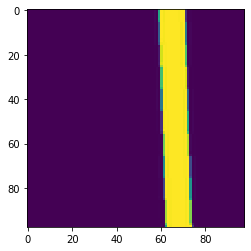

In [185]:
boundary_gt = gt_original_img[int(round(bounds.left)): int(round(bounds.right)), 
                 int(round(bounds.upper)):int(round(bounds.lower))]
plt.imshow(boundary_gt)

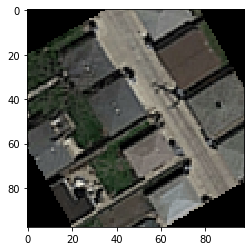

In [186]:
rotated_boundary_gt = np.asarray(PIL.Image.fromarray(np.uint8(boundary_gt * 255)).rotate(angle)).astype('float32')/255.0
plt.imshow(rotated_boundary)



In [187]:
center_point = getBoundsCenter(bounds)
center_x = rotated_boundary.shape[0]//2
center_y = center_x
padding = 28
patch_size = 16
sub_image = rotated_boundary[
                    center_x - padding - patch_size // 2:center_x + padding + patch_size // 2,
                    center_y - padding - patch_size // 2:center_y + padding + patch_size // 2]
gt_sub_image = rotated_boundary_gt[center_x - patch_size // 2:center_x + patch_size // 2,
                       center_y - patch_size // 2:center_y + patch_size // 2]
crop_sub_image = rotated_boundary[center_x - patch_size // 2:center_x + patch_size // 2,
                       center_y - patch_size // 2:center_y + patch_size // 2]

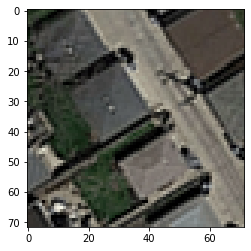

In [188]:
plt.imshow(sub_image)


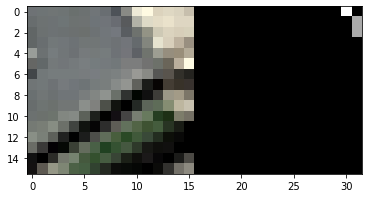

In [189]:
plt.imshow(concatenate_images(crop_sub_image, gt_sub_image))
